In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
filename="datasets/weatherHistory.csv"
df=pd.read_csv(filename)

In [3]:
print(df)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

In [4]:
#1 Is there a relationship between humidity and temperature?
correlation1=df['Humidity'].corr(df['Temperature (C)'])
print(correlation1)

-0.6322546750278026


In [5]:
#2 What about between humidity and apparent temperature? 
correlation2=df['Humidity'].corr(df['Apparent Temperature (C)'])
print(correlation2)

-0.6025709955733909


In [6]:
#3  Can you predict the apparent temperature given the humidity?
name=["Humidity","Apparent Temperature (C)"]
df=pd.read_csv(filename,usecols=name)

In [7]:
#x = Humidity & y = Temperature
y=df.iloc[:,:-1].values
x=df.iloc[:,:1].values

In [8]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=1)

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred= regressor.predict(x_test) 
x_pred= regressor.predict(x_train) 

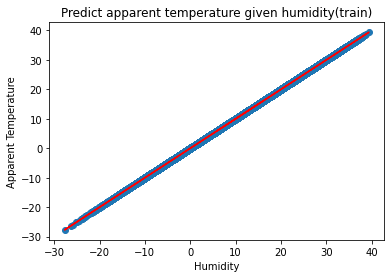

In [11]:
mtp.scatter(x_train,y_train)
mtp.plot(x_train,x_pred,color="red")
mtp.title("Predict apparent temperature given humidity(train)") 
mtp.xlabel("Humidity") 
mtp.ylabel("Apparent Temperature") 
mtp.show()

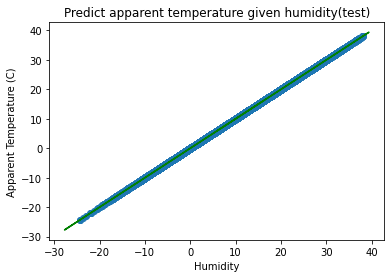

In [12]:
mtp.scatter(x_test, y_test) 
mtp.plot(x_train, x_pred, color="green") 
mtp.title("Predict apparent temperature given humidity(test)") 
mtp.xlabel("Humidity") 
mtp.ylabel("Apparent Temperature (C)") 
mtp.show()